In [ ]:
найди датафрейм и построй несколько графиков (по 2-3) хорошей и плохой визуализации

In [4]:
import pandas as pd
import numpy as np
import math
import re
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['figure.figsize'] = [10, 5]

In [5]:
df = None
def get_data():
    global df
    df = pd.read_csv("pokemon.csv")
get_data()

In [6]:
gens = df[["attack","generation","defense"]].groupby("generation").mean()

Text(0, 0.5, 'Generation')

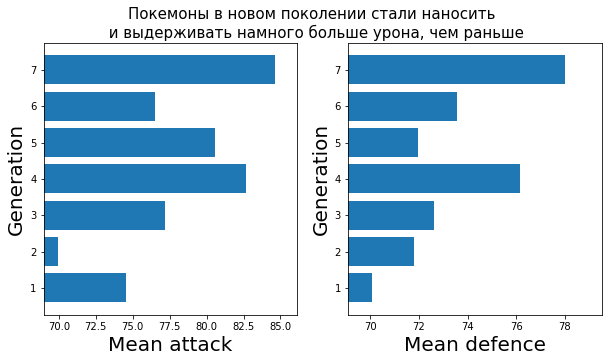

In [7]:
arr1 = gens.to_numpy()[:,0]
arr2 = gens.to_numpy()[:,1]
x = np.array([1,2,3,4,5,6,7])
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle("Покемоны в новом поколении стали наносить \n и выдерживать намного больше урона, чем раньше", fontsize=15)
ax1.barh(x,arr1)
ax1.set_xlim(np.min(arr1)-1,np.max(arr1)+1.5)
ax1.set_xlabel("Mean attack",fontsize=20)
ax1.set_ylabel("Generation",fontsize=20)
ax2.barh(x,arr2)
ax2.set_xlim(np.min(arr2)-1,np.max(arr2)+1.5)
ax2.set_xlabel("Mean defence",fontsize=20)
ax2.set_ylabel("Generation",fontsize=20)

Text(0, 0.5, 'Generation')

<Figure size 720x360 with 0 Axes>

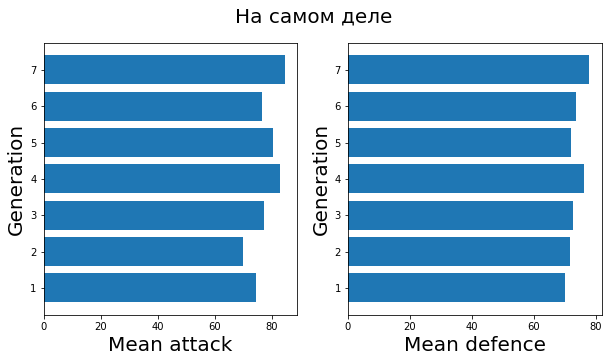

In [8]:
plt.clf()
fig, (ax1,ax2) = plt.subplots(1,2)
fig.suptitle("На самом деле", fontsize=20)
ax1.barh(x,arr1)
ax1.set_xlabel("Mean attack",fontsize=20)
ax1.set_ylabel("Generation",fontsize=20)
ax2.barh(x,arr2)
ax2.set_xlabel("Mean defence",fontsize=20)
ax2.set_ylabel("Generation",fontsize=20)

In [9]:
gens1 = df[["attack","generation","defense","is_legendary"]].groupby("generation")
leg = df.loc[ df["is_legendary"] == 1][["attack","generation","defense"]]
non_leg = df.loc[ df["is_legendary"] == 0][["attack","generation","defense"]]

C:\Users\stass\AppData\Local\Temp/ipykernel_17608/301919317.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["legendary","non-legendary"],fontsize=20)


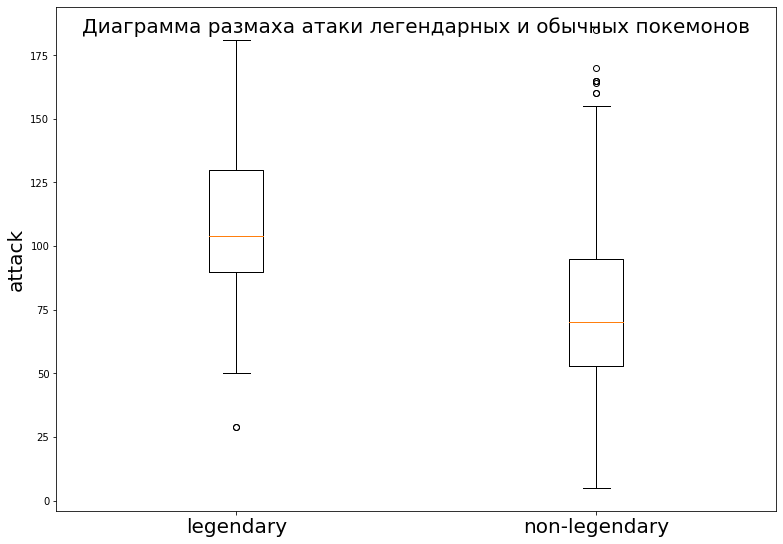

In [10]:
l_atk = leg["attack"].to_numpy().ravel()
nl_atk = non_leg["attack"].to_numpy().ravel()
l_def = leg["defense"].to_numpy().ravel()
nl_def = non_leg["defense"].to_numpy().ravel()
data = [l_atk,nl_atk]

fig = plt.figure(figsize =(10, 7))
fig.suptitle("Диаграмма размаха атаки легендарных и обычных покемонов", fontsize=20)
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(["legendary","non-legendary"],fontsize=20)
ax.set_ylabel("attack",fontsize=20)
 
# Creating plot
bp = ax.boxplot(data)

C:\Users\stass\AppData\Local\Temp/ipykernel_17608/127701260.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(["legendary","non-legendary"],fontsize=20)


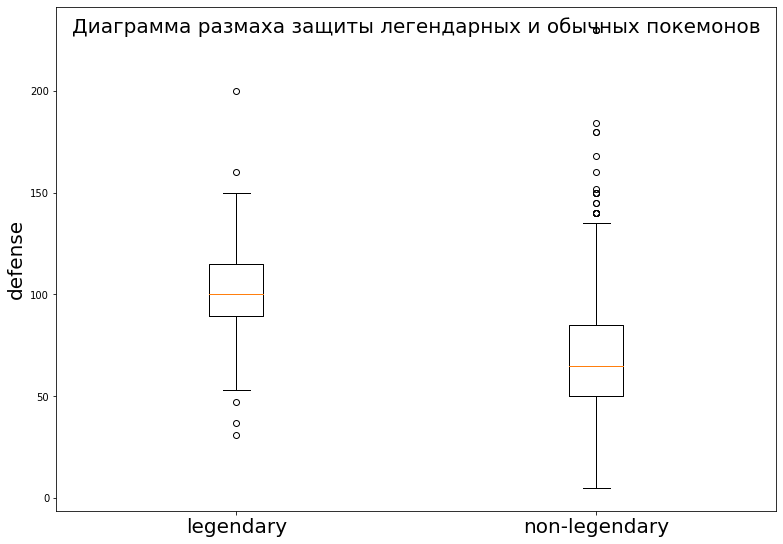

In [11]:
data = [l_def,nl_def]

fig = plt.figure(figsize =(10, 7))

fig.suptitle("Диаграмма размаха защиты легендарных и обычных покемонов", fontsize=20)

ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(["legendary","non-legendary"],fontsize=20)
ax.set_ylabel("defense",fontsize=20)
 
# Creating plot
bp = ax.boxplot(data)

In [12]:
types, count = np.unique(df["type1"].to_numpy(),return_counts=True)
count_sort_ind = np.argsort(-count)
types, count = types[count_sort_ind], count[count_sort_ind]

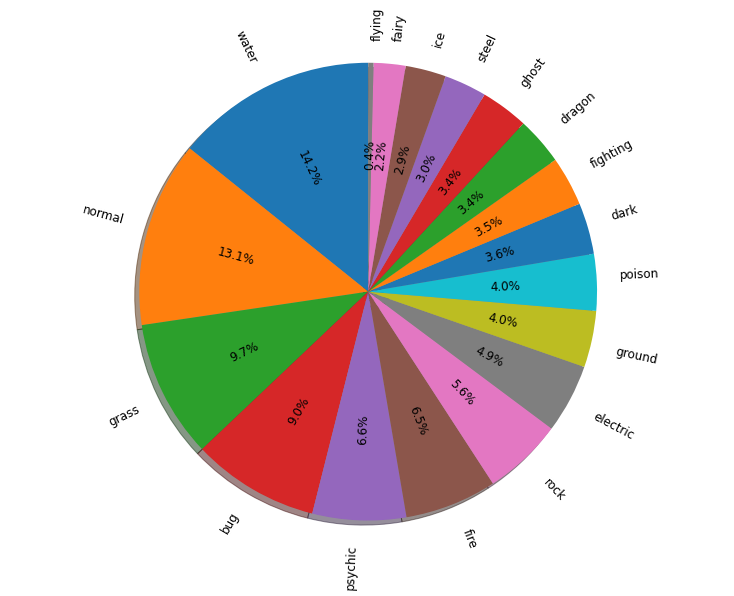

In [13]:
labels = types
sizes = count

fig1 = plt.figure(figsize =(10, 7))
fig1.subplots_adjust(top=0.8)
ax1 = fig1.add_axes([0, 0, 1, 1])
patches, labels, pct_texts =ax1.pie(sizes, explode=None, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90,rotatelabels=True,textprops={"fontsize":12})
for label, pct_text in zip(labels, pct_texts):
    pct_text.set_rotation(label.get_rotation())
ax1.axis('equal')
plt.show()